In [2]:
from DRL.constraints_code.parser import parse_constraints_file
from DRL.constraints_code.feature_orderings import set_ordering
from DRL.constraints_code.compute_sets_of_constraints import compute_sets_of_constraints
import torch
import pandas as pd
import torch.nn as nn
from DRL.constraints_code.correct_predictions import correct_preds, check_all_constraints_sat

import random
import numpy as np
from sklearn.model_selection import train_test_split

def seed_everything(seed: int):
    """Seed Python, NumPy, and PyTorch for reproducibility."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if using multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f"All random seeds set to {seed}")



In [68]:
sampled_data = pd.read_csv("/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/data_generated_pretrained/n10_r2.1999999999999997_i2_42_train.csv")

In [69]:
sampled_data = sampled_data.iloc[:,-10:].to_numpy()

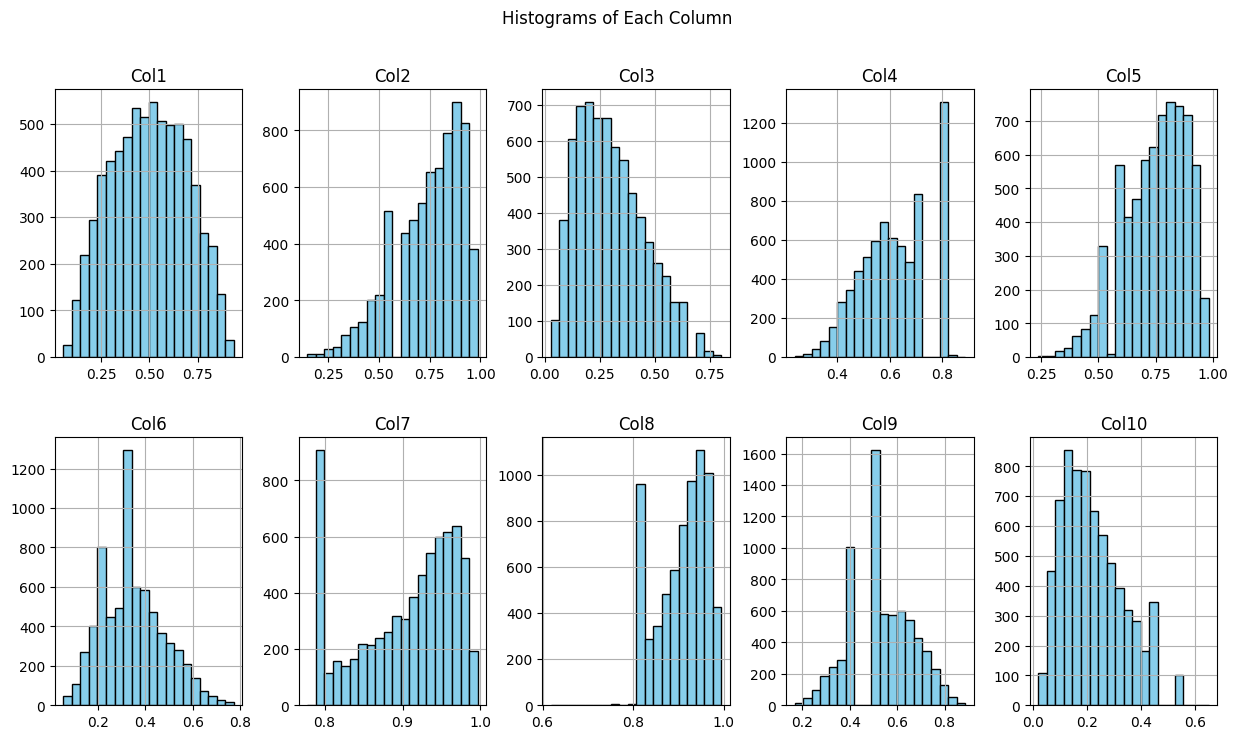

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert tensor to DataFrame
df = pd.DataFrame(sampled_data, columns=[f'Col{i+1}' for i in range(sampled_data.shape[1])])

# Plot histograms for each column
df.hist(bins=20, figsize=(15,8), layout=(2,5), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Each Column")
plt.show()


(array([  15.,   93.,  246.,  485.,  760.,  932.,  988.,  985.,  810.,
        1686.]),
 array([0.19287708, 0.21858937, 0.24430166, 0.27001396, 0.29572625,
        0.32143854, 0.34715083, 0.37286312, 0.39857542, 0.42428771,
        0.45      ]),
 <BarContainer object of 10 artists>)

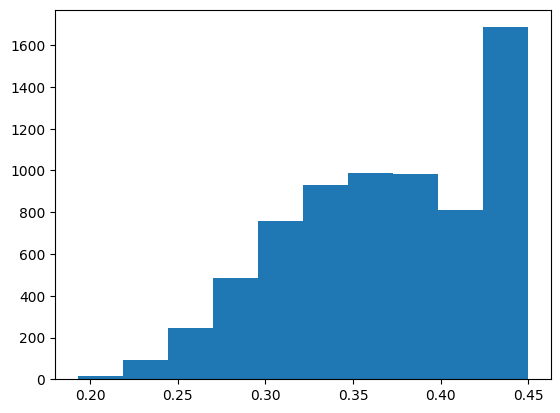

In [28]:
import matplotlib.pyplot as plt
plt.hist(sampled_data[:, 1])

Text(0, 0.5, 'feature 1')

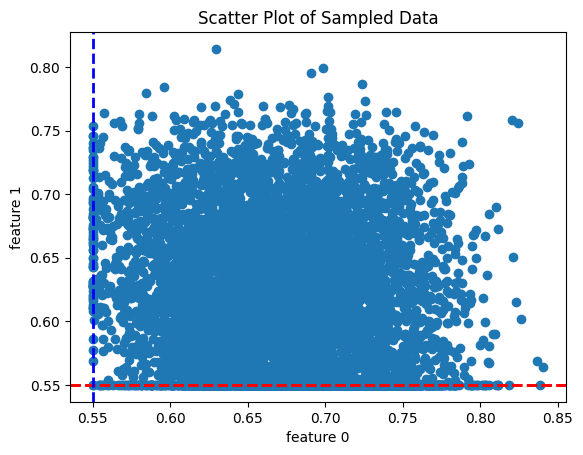

In [30]:
import matplotlib.pyplot as plt

# Example scatter plot
plt.scatter(sampled_data[:, 0], sampled_data[:, 6])

# Add title
plt.title("Scatter Plot of Sampled Data")

# Add horizontal line at y=0
plt.axhline(y=0.55, color='red', linestyle='--', linewidth=2)
plt.axhline(y=0.55, color='red', linestyle='--', linewidth=2)

# Add vertical line at x=0
plt.axvline(x=0.55, color='blue', linestyle='--', linewidth=2)

plt.xlabel("feature 0")
plt.ylabel("feature 1")
# Optional: add labels

Coefficient: [86.81798328]
Intercept: 51.834576638509425
MSE: 246.12179288664464
RMSE: 15.688269276330153


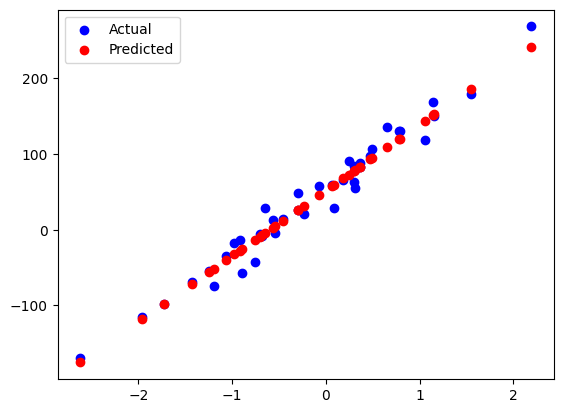

In [31]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Generate synthetic regression data
X, y = make_regression(
    n_samples=200,
    n_features=1,
    noise=15,
    bias=50,
    random_state=42
)

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Metrics (compatible)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # manually compute RMSE

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)

# 6. Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.legend()
plt.show()


Text(0.5, 0, 'X-axis')

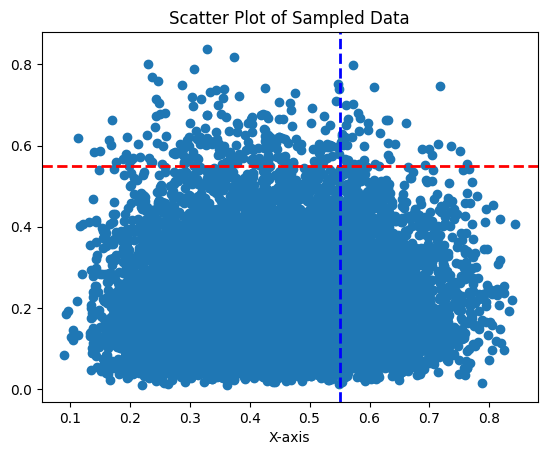

In [107]:
import matplotlib.pyplot as plt

# Example scatter plot
plt.scatter(orig[:, 0], orig[:, 1])

# Add title
plt.title("Scatter Plot of Sampled Data")

# Add horizontal line at y=0
plt.axhline(y=0.55, color='red', linestyle='--', linewidth=2)

# Add vertical line at x=0
plt.axvline(x=0.55, color='blue', linestyle='--', linewidth=2)

# Optional: add labels
plt.xlabel("X-axis")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert tensor to DataFrame
df = pd.DataFrame(sampled_data, columns=[f'Col{i+1}' for i in range(sampled_data.shape[1])])

# Plot histograms for each column
df.hist(bins=20, figsize=(15,8), layout=(2,5), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Each Column")
plt.show()


In [50]:
!pip install python-sat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.3 MB/s  0:00:01 eta 0:00:01


In [54]:
from pysat.formula import CNF
from pysat.solvers import Solver

cnf_file = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constraints_generated/sat_constraints/n10_r3.5999999999999996_i2.cnf"

formula = CNF(from_file=cnf_file)
solver = Solver(name='glucose4')
solver.append_formula(formula.clauses)

solutions = []

while solver.solve():
    model = solver.get_model()
    solutions.append(model)

    # Block the current model to get new ones
    blocking_clause = [-lit for lit in model]
    solver.add_clause(blocking_clause)

solver.delete()

print("Found", len(solutions), "solutions.")
for s in solutions:
    print(s)


Found 6 solutions.
[1, 2, 3, -4, -5, 6, -7, 8, 9, -10]
[1, 2, 3, -4, -5, -6, -7, -8, 9, -10]
[-1, 2, 3, -4, -5, -6, -7, -8, 9, -10]
[1, -2, -3, -4, 5, -6, 7, -8, 9, 10]
[1, -2, -3, -4, 5, -6, 7, 8, 9, 10]
[1, 2, 3, 4, -5, 6, -7, 8, 9, -10]


In [55]:
import numpy as np

# --- Define your constrained regions ---
regions = [
    [1, 2, 3, -4, -5, 6, -7, 8, 9, -10],
    [1, 2, 3, -4, -5, -6, -7, -8, 9, -10],
    [-1, 2, 3, -4, -5, -6, -7, -8, 9, -10],
    [1, -2, -3, -4, 5, -6, 7, -8, 9, 10],
    [1, -2, -3, -4, 5, -6, 7, 8, 9, 10],
    [1, 2, 3, 4, -5, 6, -7, 8, 9, -10]
]

# --- Parameters ---
LOW = 0.0
HI = 1.0
TH_LOW = 0.45
TH_HIGH = 0.55

# --- Function to sample y in a region ---
def sample_y_region(region, n_samples=200):
    """
    Sample y vectors inside a constrained region.
    """
    dim = len(region)
    Y = np.zeros((n_samples, dim))
    for i, s in enumerate(region):
        if s > 0:
            # Positive constraint: > 0.55
            Y[:, i] = np.random.uniform(TH_HIGH, HI, n_samples)
        else:
            # Negative constraint: < 0.45
            Y[:, i] = np.random.uniform(LOW, TH_LOW, n_samples)
    return Y

# --- Example: generate X randomly, Y according to regions ---
def generate_dataset(regions, samples_per_region=200, x_dim=5):
    """
    Generate X (real) and Y (10-D) dataset.
    X is sampled randomly, Y is constrained.
    """
    X_all = []
    Y_all = []

    for r in regions:
        # Sample X freely
        Xr = np.random.randn(samples_per_region, x_dim)

        # Sample Y constrained by the region
        Yr = sample_y_region(r, samples_per_region)

        X_all.append(Xr)
        Y_all.append(Yr)

    # Combine all regions
    X = np.vstack(X_all)
    Y = np.vstack(Y_all)

    return X, Y

# --- Generate dataset ---
X, Y = generate_dataset(regions, samples_per_region=300, x_dim=5)

print("X shape:", X.shape)   # (1800, 5)
print("Y shape:", Y.shape)   # (1800, 10)
print("Example Y rows:\n", Y[:5])


X shape: (1800, 5)
Y shape: (1800, 10)
Example Y rows:
 [[0.74143156 0.72584788 0.63132815 0.07423752 0.4343346  0.5921815
  0.18918091 0.94562684 0.99361802 0.32730842]
 [0.91482456 0.76025735 0.86243812 0.32725595 0.29372192 0.69309146
  0.14566024 0.59402764 0.97202424 0.06118261]
 [0.97384881 0.95281197 0.88851547 0.40082589 0.05792922 0.72153488
  0.27877056 0.6663673  0.60816313 0.10581136]
 [0.94145985 0.59975085 0.82798943 0.3864218  0.34736722 0.83472064
  0.38689338 0.57459527 0.94870909 0.22738763]
 [0.86679977 0.87901192 0.94563935 0.08291568 0.4282991  0.76218397
  0.2216882  0.65300134 0.61878796 0.16313335]]


In [ ]:
pd.read_csv()

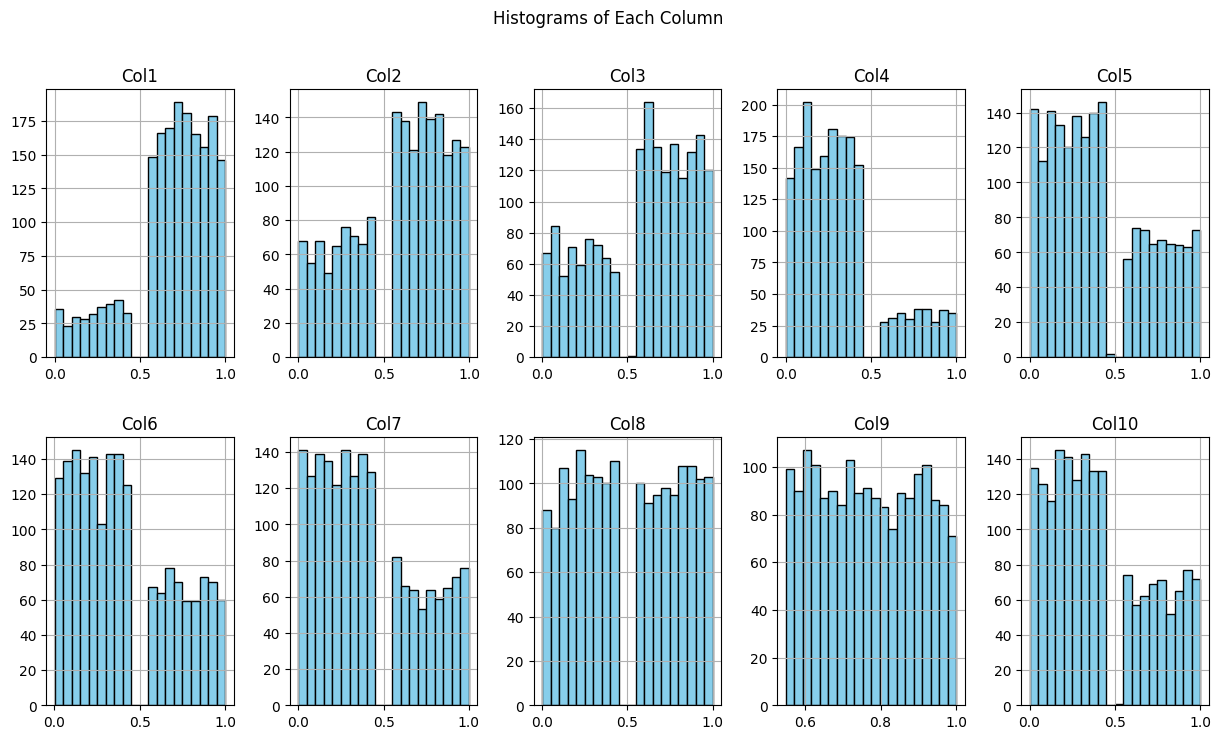

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert tensor to DataFrame
df = pd.DataFrame(Y, columns=[f'Col{i+1}' for i in range(Y.shape[1])])

# Plot histograms for each column
df.hist(bins=20, figsize=(15,8), layout=(2,5), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Each Column")
plt.show()


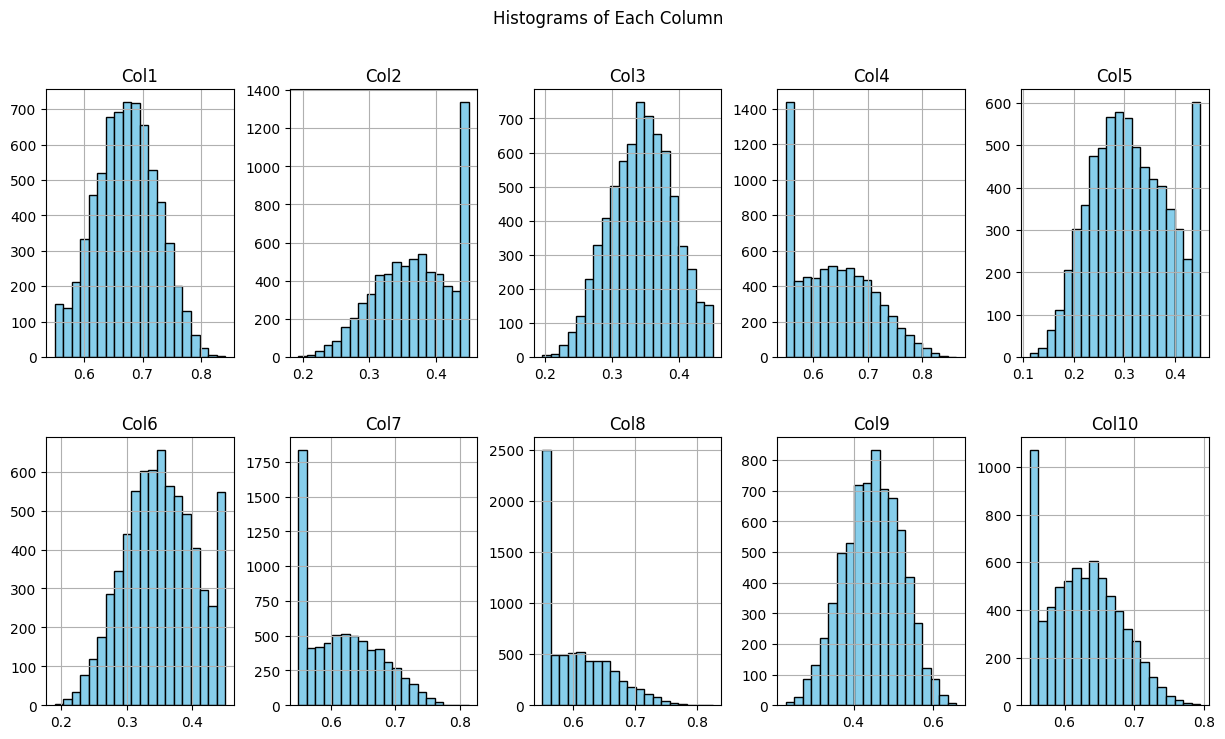

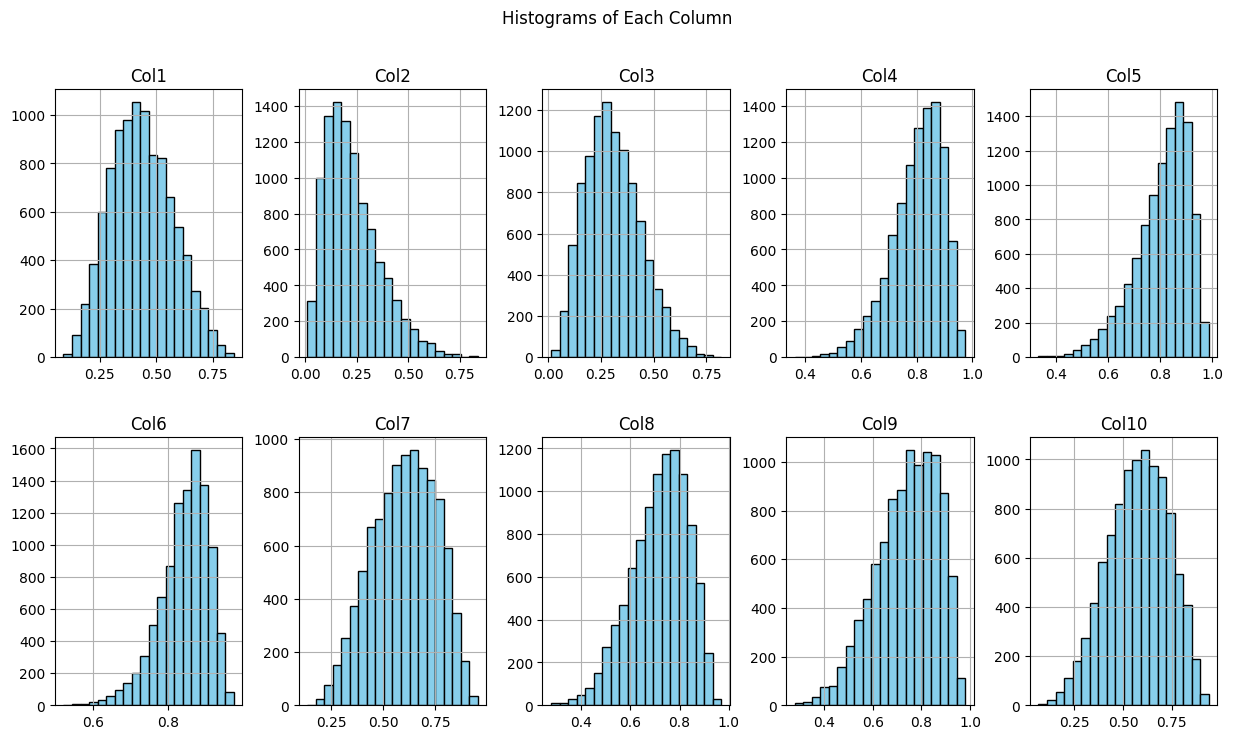

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert tensor to DataFrame
df = pd.DataFrame(orig.numpy(), columns=[f'Col{i+1}' for i in range(orig.shape[1])])

# Plot histograms for each column
df.hist(bins=20, figsize=(15,8), layout=(2,5), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Each Column")
plt.show()


In [123]:
import pandas as pd

In [124]:
df = pd.read_csv("/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/data_generated_pretrained/data_generation_info.csv")

In [125]:
df['costraint_path'] = df['costraint_path'].apply(lambda x: x.split("/")[-1])


In [126]:
df[['n', 'r', 'i']] = df['costraint_path'].str.extract(r"n(\d+)_r([\d.]+)_i(\d+)")


In [127]:
df['loss_f1'] = df['loss_f1'].str.extract(r'tensor\(([\d.]+)\)').astype(float)
df['diversity_loss'] = df['diversity_loss'].str.extract(r'tensor\(([\d.]+)\)').astype(float)


In [128]:
grouped = df.groupby("r").loss_f1.mean().reset_index()

In [129]:
df['loss_f1'] = df['loss_f1']

TypeError: Expected numeric dtype, got object instead.

<BarContainer object of 20 artists>

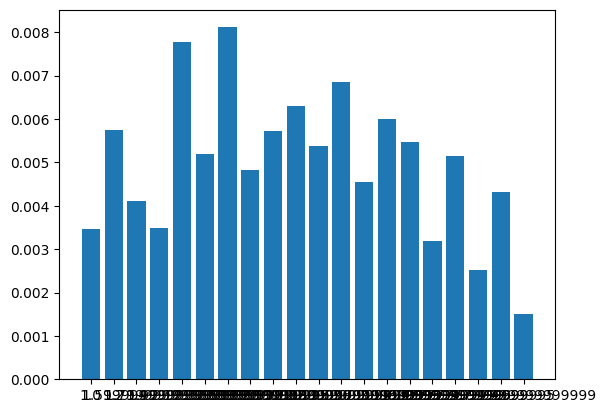

In [131]:
plt.bar(grouped.r, grouped.loss_f1)

In [ ]:
from pysat.formula import CNF
from pysat.solvers import Solver
import os
base = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constraints_generated/sat_constraints"
solutions_global = {}
for i in os.listdir(base):
    if ".cnf" in i:
        cnf_file = os.path.join(base, i)

        formula = CNF(from_file=cnf_file)
        solver = Solver(name='glucose4')
        solver.append_formula(formula.clauses)

        solutions = []

        while solver.solve():
            model = solver.get_model()
            solutions.append(model)

            # Block the current model to get new ones
            blocking_clause = [-lit for lit in model]
            solver.add_clause(blocking_clause)

        solver.delete()

        print("Found", len(solutions), "solutions.")
        
        solutions_global[i] = solutions


In [176]:
def get_coefs(inequalities_path):
    inequalities = []
    with open(inequalities_path, "r", encoding="utf-8") as file:
        inequalities = file.read().split("\n")[1:]
    coef_dict = {}

    for ineq in inequalities:
        clauses = ineq.split(" or ")
        for clause in clauses:
            var, value = clause.split(">=")
            var = var.strip()
            value = float(value.strip())
            var = var.replace("y_", "")
            coef_dict[var] = value

    return coef_dict


In [178]:
tolerance = 1e-6
for cnf_name in solutions_global:
    if len(solutions_global[cnf_name]) == 0:
        continue
    for index in range(1, 4):
        data_path_te = cnf_name[:-4] + f"_{index}_test.csv"
        data_path_tr = cnf_name[:-4] + f"_{index}_train.csv"
        data_path_v = cnf_name[:-4] + f"_{index}_valid.csv"
        test_data = pd.read_csv(os.path.join("data_generated_pretrained",data_path_te)).to_numpy()[-10:]
        train_data = pd.read_csv(os.path.join("data_generated_pretrained",data_path_tr)).to_numpy()[-10:]
        valid_data = pd.read_csv(os.path.join("data_generated_pretrained",data_path_v)).to_numpy()[-10:]
        constraint_path = os.path.join("constraints_generated/smt_constraints_random", cnf_name[:-4]+ f".txt") 
        coef_dict = get_coefs(constraint_path)
        data = np.concatenate([test_data, train_data, valid_data], axis = 0)
        for sol in solutions_global[cnf_name]:
            buf = data > -100
            for point in sol:
                point = str(point)
                if point not in coef_dict:
                    continue
                else:
                    if "-" in point:
                        buf &= data <= abs(coef_dict[point]) + tolerance
                    else: 
                        buf &= data >= abs(coef_dict[point]) - tolerance
                        
                        


[1, -2, -3, -4, 5, -6, -7, -8, -9, -10]
[1, -2, -3, -4, 5, -6, 7, -8, -9, -10]
[1, -2, -3, -4, 5, -6, 7, -8, 9, -10]
[1, -2, -3, -4, 5, -6, -7, -8, 9, -10]
[1, 2, -3, -4, 5, -6, -7, -8, -9, -10]
[1, 2, -3, -4, 5, -6, 7, -8, -9, -10]
[1, 2, -3, -4, 5, -6, 7, -8, 9, -10]
[1, 2, -3, 4, 5, -6, 7, -8, 9, -10]
[1, 2, -3, 4, -5, -6, 7, -8, 9, 10]
[1, 2, -3, 4, -5, -6, 7, 8, 9, 10]
[1, 2, -3, 4, -5, 6, 7, 8, 9, 10]
[-1, 2, -3, 4, -5, 6, 7, 8, 9, 10]
[-1, -2, -3, 4, -5, 6, 7, 8, 9, 10]
[1, -2, -3, 4, -5, 6, 7, 8, 9, 10]
[1, -2, -3, 4, -5, -6, 7, 8, 9, 10]
[1, -2, -3, 4, -5, -6, 7, -8, 9, 10]
[1, -2, -3, -4, -5, -6, 7, -8, 9, 10]
[1, -2, 3, -4, 5, -6, 7, -8, 9, 10]
[-1, -2, 3, -4, 5, -6, 7, -8, 9, 10]
[1, 2, -3, -4, 5, -6, -7, -8, 9, -10]
[1, -2, -3, -4, -5, -6, -7, -8, 9, 10]
[1, -2, -3, -4, -5, 6, -7, -8, 9, 10]
[1, -2, 3, -4, -5, 6, -7, -8, 9, 10]
[1, -2, 3, -4, 5, 6, -7, -8, 9, 10]
[1, -2, 3, -4, 5, -6, -7, -8, 9, 10]
[-1, -2, 3, -4, 5, -6, -7, -8, 9, 10]
[1, -2, -3, -4, 5, -6, -7, -8, -9, -

In [206]:
import pandas as pd
data_det = pd.read_csv("/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/model_results/model_evaluation_results_pretrain_deterministic.csv")
data_dis = pd.read_csv("/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/model_results/model_evaluation_results_pretrain.csv")


In [207]:
data_det["ratio"] = data_det["constraint_path"].apply(lambda x :float(x.split("/")[-1].split("_")[1][1:])) 
data_dis["ratio"] = data_dis["constraint_path"].apply(lambda x :float(x.split("/")[-1].split("_")[1][1:])) 

In [214]:
data_det

,model_1_mae,model_1_likelihood,model_2_mae,model_2_likelihood,y_test_violation,model_1_violation,model_2_violation,constraint_path,dataset_index,y_test_violation_1e-06,...,model_1_violation_0.0001,model_1_violation_0.001,model_1_violation_0.01,model_1_violation_0.1,model_2_violation_1e-06,model_2_violation_0.0001,model_2_violation_0.001,model_2_violation_0.01,model_2_violation_0.1,ratio
0,0.013357,-0.611211,0.013610,-0.487628,0.0,0.262000,0.269333,constraints_generated/smt_constraints_random/n...,1,0.0,...,0.261333,0.254000,0.220667,0.005333,0.269333,0.268667,0.266000,0.220000,0.004667,1.0
1,0.011823,-0.586401,0.011201,-0.551060,0.0,0.162667,0.148000,constraints_generated/smt_constraints_random/n...,2,0.0,...,0.162000,0.161333,0.126667,0.001333,0.148000,0.147333,0.144000,0.111333,0.001333,1.0
2,0.013361,-0.637560,0.012551,-0.509687,0.0,0.402000,0.389333,constraints_generated/smt_constraints_random/n...,1,0.0,...,0.398000,0.383333,0.214667,0.003333,0.389333,0.387333,0.368667,0.220667,0.000000,1.0
3,0.012506,-0.646649,0.011751,-0.436728,0.0,0.107333,0.092667,constraints_generated/smt_constraints_random/n...,2,0.0,...,0.107333,0.105333,0.088667,0.006000,0.092667,0.092667,0.090000,0.066667,0.002000,1.0
4,0.013511,-0.655200,0.012461,-0.537183,0.0,0.200000,0.205333,constraints_generated/smt_constraints_random/n...,1,0.0,...,0.198667,0.197333,0.166000,0.008667,0.205333,0.204667,0.200667,0.154000,0.004667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.009888,-0.627183,0.008863,-0.523064,0.0,0.133333,0.114000,constraints_generated/smt_constraints_random/n...,2,0.0,...,0.133333,0.131333,0.112667,0.016667,0.114000,0.114000,0.108000,0.082667,0.002667,4.8
176,0.009324,-0.574409,0.008546,-0.514750,0.0,0.183333,0.134000,constraints_generated/smt_constraints_random/n...,1,0.0,...,0.183333,0.173333,0.124000,0.006667,0.134000,0.134000,0.128667,0.084000,0.000667,4.8
177,0.009304,-0.605846,0.008720,-0.521985,0.0,0.206667,0.161333,constraints_generated/smt_constraints_random/n...,2,0.0,...,0.204667,0.198667,0.129333,0.009333,0.161333,0.160667,0.156000,0.104000,0.007333,4.8
178,0.010786,-0.648085,0.010595,-0.441097,0.0,0.191333,0.160667,constraints_generated/smt_constraints_random/n...,1,0.0,...,0.190667,0.188667,0.149333,0.013333,0.160667,0.159333,0.156000,0.114000,0.003333,4.8


In [216]:
grouped_det = data_det.groupby("ratio")[["model_1_violation", "model_2_violation"]].mean()
grouped_dis = data_dis.groupby("ratio")[["model_1_violation", "model_2_violation"]].mean()


,model_1_violation,model_2_violation
ratio,,
1.0,True,True
1.2,True,True
1.4,True,True
1.6,True,True
1.8,True,True
2.0,True,True
2.2,True,True
2.4,True,True
2.6,True,True


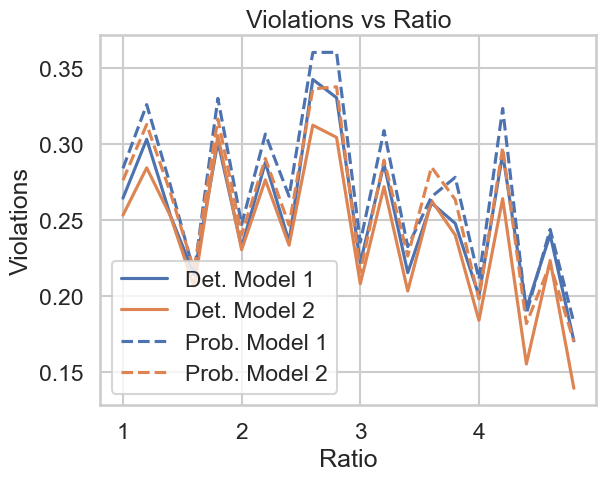

In [218]:
grouped_det = data_det.groupby("ratio")[["model_1_violation", "model_2_violation"]].mean()
grouped_dis = data_dis.groupby("ratio")[["model_1_violation", "model_2_violation"]].mean()

plt.plot(grouped_det.index, grouped_det["model_1_violation"], label="Det. Model 1", color="C0")
plt.plot(grouped_det.index, grouped_det["model_2_violation"], label="Det. Model 2", color="C1")

plt.plot(grouped_dis.index, grouped_dis["model_1_violation"], label="Prob. Model 1", linestyle="--", color="C0")
plt.plot(grouped_dis.index, grouped_dis["model_2_violation"], label="Prob. Model 2", linestyle="--" , color="C1")

plt.xlabel("Ratio")
plt.ylabel("Violations")
plt.title("Violations vs Ratio")
plt.legend()
plt.grid(True)
plt.show()


In [226]:
data_info

,n_violations,loss_f1,diversity_loss,costraint_path,seed,ratio
0,0.3214,tensor(0.0036),tensor(29.8446),/Users/mihajlobulesnij/Documents/system/RAI/pr...,1,1.0
1,0.2004,tensor(0.0016),tensor(38.6936),/Users/mihajlobulesnij/Documents/system/RAI/pr...,2,1.0
2,0.1940,tensor(0.0020),tensor(30.7046),/Users/mihajlobulesnij/Documents/system/RAI/pr...,3,1.0
3,0.5899,tensor(0.0065),tensor(38.9942),/Users/mihajlobulesnij/Documents/system/RAI/pr...,1,1.0
4,0.1601,tensor(0.0014),tensor(42.4110),/Users/mihajlobulesnij/Documents/system/RAI/pr...,2,1.0
...,...,...,...,...,...,...
265,0.3052,tensor(0.0029),tensor(82.9560),/Users/mihajlobulesnij/Documents/system/RAI/pr...,2,4.8
266,0.3338,tensor(0.0031),tensor(79.9607),/Users/mihajlobulesnij/Documents/system/RAI/pr...,3,4.8
267,0.2696,tensor(0.0024),tensor(58.1105),/Users/mihajlobulesnij/Documents/system/RAI/pr...,1,4.8
268,0.2410,tensor(0.0018),tensor(59.1187),/Users/mihajlobulesnij/Documents/system/RAI/pr...,2,4.8


<Axes: xlabel='ratio'>

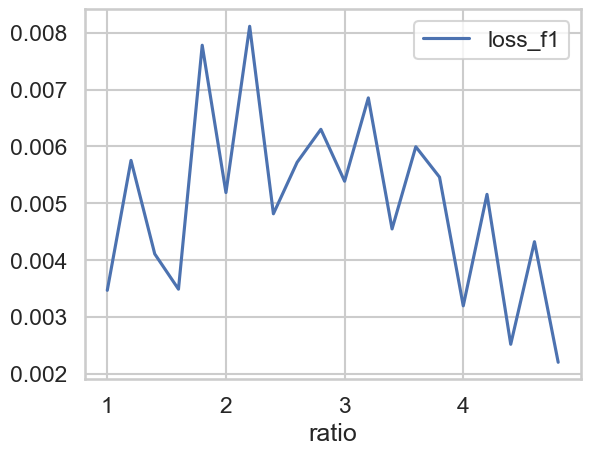

In [232]:
import pandas as pd
data_info= pd.read_csv("/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/data_generated_pretrained/data_generation_info.csv")
data_info["ratio"] = data_info["costraint_path"].apply(lambda x :float(x.split("/")[-1].split("_")[1][1:])) 
data_info['loss_f1'] = data_info['loss_f1'].str.extract(r'tensor\(([\d.]+)\)').astype(float)
data_info['diversity_loss'] = data_info['diversity_loss'].str.extract(r'tensor\(([\d.]+)\)').astype(float)
data_info.groupby("ratio")[["n_violations", "loss_f1", "diversity_loss"]].mean().plot()

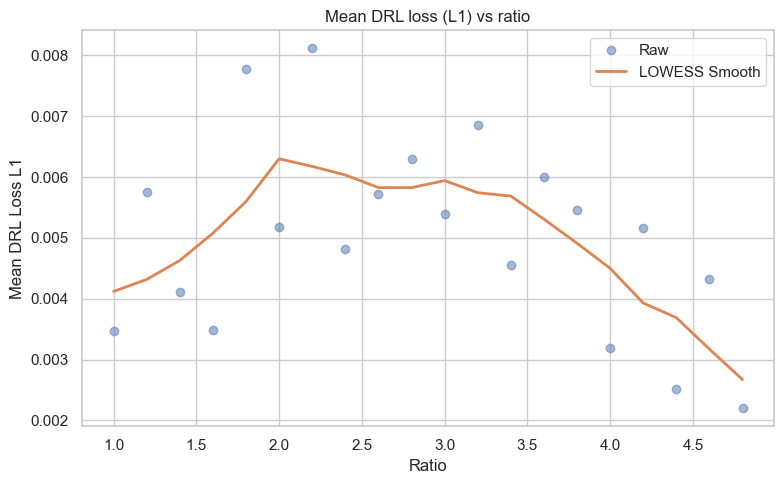

In [241]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

grouped = data_info.groupby("ratio")["loss_f1"].mean().sort_index()

# LOWESS smoothing
smooth = sm.nonparametric.lowess(
    grouped.values,
    grouped.index,
    frac=0.3  # smoothing strength (0.1=less smooth, 0.5=more smooth)
)

plt.figure(figsize=(8,5))
plt.plot(grouped.index, grouped.values, "o", alpha=0.5, label="Raw")
plt.plot(smooth[:,0], smooth[:,1], "-", linewidth=2, label="LOWESS Smooth")

plt.xlabel("Ratio")
plt.ylabel("Mean DRL Loss L1")
plt.title("Mean DRL loss (L1) vs ratio")
plt.legend()
plt.tight_layout()
plt.show()


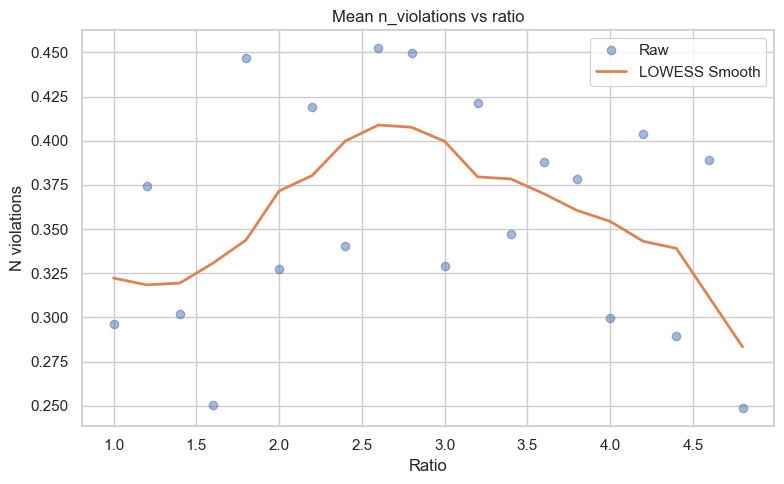

In [243]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

grouped = data_info.groupby("ratio")["n_violations"].mean().sort_index()

# LOWESS smoothing
smooth = sm.nonparametric.lowess(
    grouped.values,
    grouped.index,
    frac=0.3  # smoothing strength (0.1=less smooth, 0.5=more smooth)
)

plt.figure(figsize=(8,5))
plt.plot(grouped.index, grouped.values, "o", alpha=0.5, label="Raw")
plt.plot(smooth[:,0], smooth[:,1], "-", linewidth=2, label="LOWESS Smooth")

plt.xlabel("Ratio")
plt.ylabel("N violations")
plt.title("Mean n_violations vs ratio")
plt.legend()
plt.tight_layout()
plt.show()


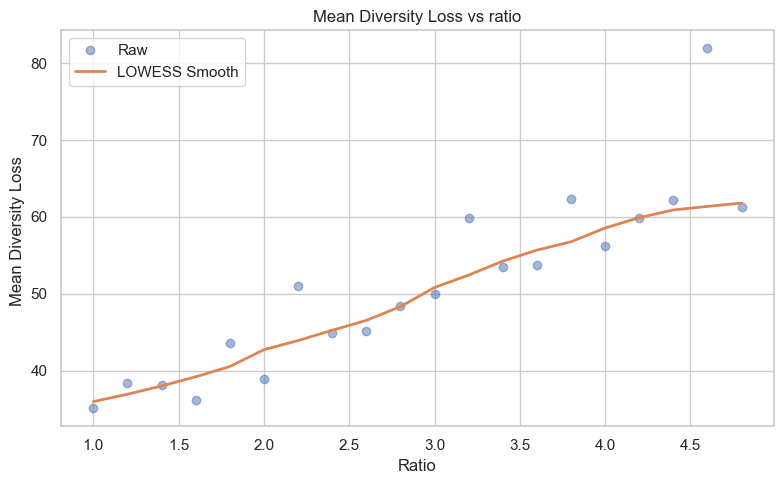

In [240]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

grouped = data_info.groupby("ratio")["diversity_loss"].mean().sort_index()

# LOWESS smoothing
smooth = sm.nonparametric.lowess(
    grouped.values,
    grouped.index,
    frac=0.3  # smoothing strength (0.1=less smooth, 0.5=more smooth)
)

plt.figure(figsize=(8,5))
plt.plot(grouped.index, grouped.values, "o", alpha=0.5, label="Raw")
plt.plot(smooth[:,0], smooth[:,1], "-", linewidth=2, label="LOWESS Smooth")

plt.xlabel("Ratio")
plt.ylabel("Mean Diversity Loss ")
plt.title("Mean Diversity Loss vs ratio")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

grouped = data_info.groupby("ratio")["loss_f1"].mean().sort_index()

# LOWESS smoothing
smooth = sm.nonparametric.lowess(
    grouped.values,
    grouped.index,
    frac=0.3  # smoothing strength (0.1=less smooth, 0.5=more smooth)
)

plt.figure(figsize=(8,5))
plt.plot(grouped.index, grouped.values, "o", alpha=0.5, label="Raw")
plt.plot(smooth[:,0], smooth[:,1], "-", linewidth=2, label="LOWESS Smooth")

plt.xlabel("Ratio")
plt.ylabel("Mean Loss F1")
plt.title("Smoothed Trend (LOWESS)")
plt.legend()
plt.tight_layout()
plt.show()


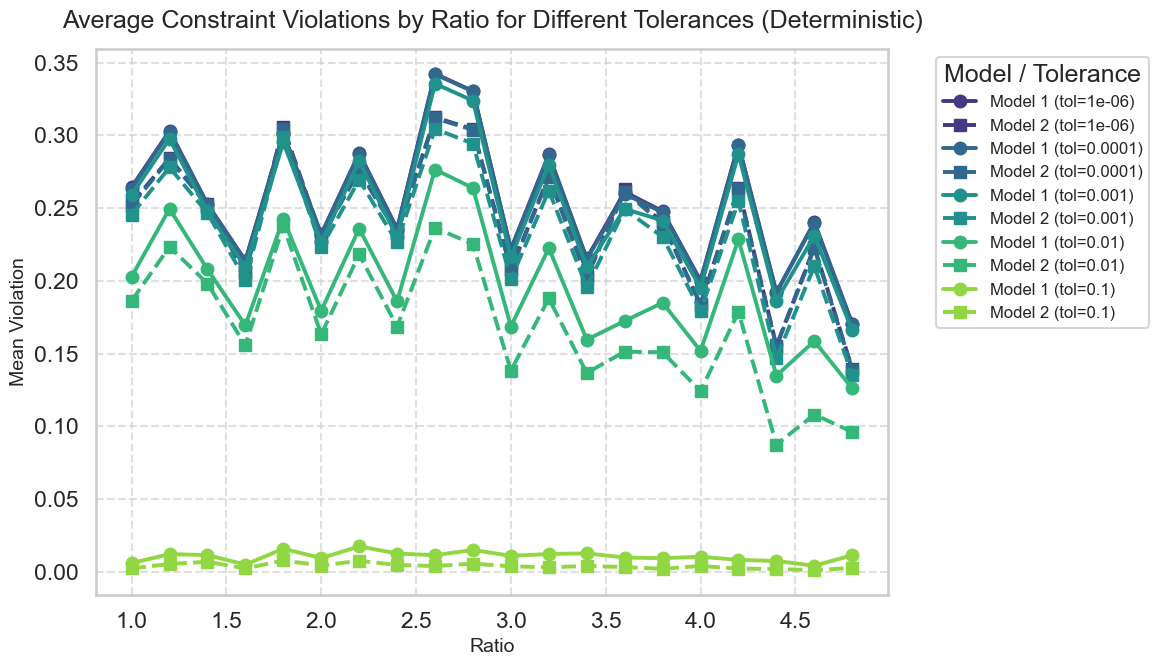

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", context="talk")

# --- Config ---
tolerances = [1e-6, 0.0001, 0.001, 0.01, 0.1]
palette = sns.color_palette("viridis", len(tolerances))  # color = tolerance

plt.figure(figsize=(12, 7))

# --- Plot each tolerance ---
for i, tol in enumerate(tolerances):
    col1 = f"model_1_violation_{tol}"
    col2 = f"model_2_violation_{tol}"

    if col1 not in data.columns or col2 not in data.columns:
        print(f"⚠️ Missing columns for tolerance {tol}, skipping...")
        continue

    m1 = data.groupby("ratio")[col1].mean()
    m2 = data.groupby("ratio")[col2].mean()

    color = palette[i]

    # --- Model 1: solid + circle ---
    plt.plot(
        m1.index,
        m1.values,
        marker="o",
        linewidth=2.8,
        linestyle="-",
        color=color,
        label=f"Model 1 (tol={tol})"
    )

    # --- Model 2: dashed + square ---
    plt.plot(
        m2.index,
        m2.values,
        marker="s",
        linewidth=2.8,
        linestyle="--",
        color=color,
        label=f"Model 2 (tol={tol})"
    )

# --- Style ---
plt.title("Average Constraint Violations by Ratio for Different Tolerances (Deterministic)", fontsize=18, pad=15)
plt.xlabel("Ratio", fontsize=14)
plt.ylabel("Mean Violation", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# --- Legend outside for clarity ---
plt.legend(
    title="Model / Tolerance",
    fontsize=12,
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()
